<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/gradient-boosting/shap_catboost_analysis_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP (SHaped Additive exPlanations)

SHAP is a game theortic approach to explain the output of any machine learning  model. It connects optimal credit allocation with local expectations using the classic Shapley value from game theory and their related extensions.

In [0]:
!pip install -q shap
!pip install -q --upgrade catboost

In [10]:
import catboost
import shap

from catboost import CatBoostRegressor
from catboost import Pool

print(f'catboost: {catboost.__version__}')
print(f'shap: {shap.__version__}')

catboost: 0.21
shap: 0.34.0


Let's explore shap values for dataset with numeric features.

In [0]:
X, y = shap.datasets.boston()

In [0]:
model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.1,
    random_seed=123
)

model.fit(X, y, verbose=False, plot=False);

In [13]:
shap.initjs()

shap_values = model.get_feature_importance(Pool(X, y), type='ShapValues')

expected_value = shap_values[0, -1]
shap_values = shap_values[:, :-1]

shap.force_plot(expected_value, shap_values[0, :], X.iloc[0, :])

The above graph shows how each parameter contributes to the model's output. 

If we take many explanations such as the one above, rotate them 90 degrees, and then stack them horizontally, we can see explantions for the entire dataset.

In [19]:
shap.initjs()
shap.force_plot(expected_value, shap_values, X)

To understand how a single feature effects the output of the model we ca plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. 

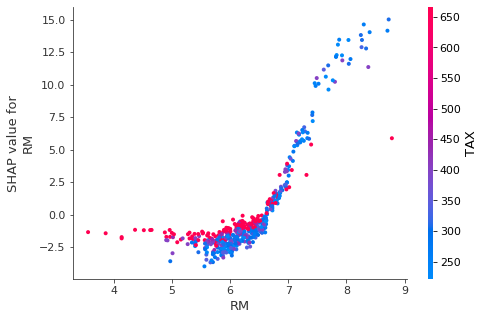

In [22]:
shap.dependence_plot('RM', shap_values, X)

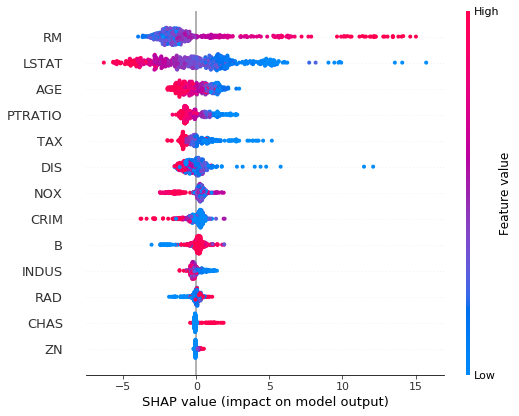

In [23]:
shap.summary_plot(shap_values, X)

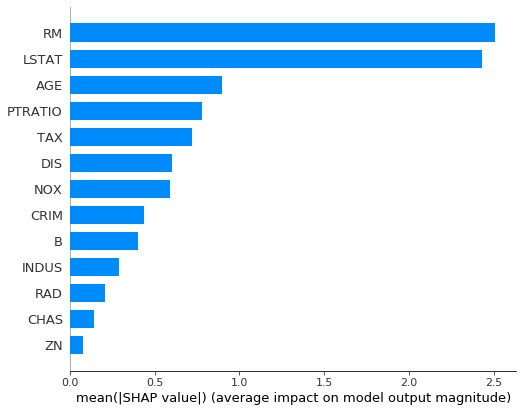

In [24]:
shap.summary_plot(shap_values, X, plot_type='bar')